In [29]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [1]:
import zipfile

zip = zipfile.ZipFile('C:/Users/aqili/Downloads/10_food_classes_10_percent.zip')
zip.extractall()
zip.close()

In [4]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [3]:
import tensorflow as tf

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                                   image_size = IMAGE_SHAPE,
                                                                   batch_size = BATCH_SIZE,
                                                                   label_mode = 'categorical')
test_data = tf.keras.utils.image_dataset_from_directory(directory = test_dir,
                                                       image_size = IMAGE_SHAPE,
                                                       batch_size = BATCH_SIZE,
                                                       label_mode = 'categorical')

NameError: name 'train_dir' is not defined

In [6]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [7]:
for i in train_data_10_percent.take(1):
    print(i[0].shape)

(32, 224, 224, 3)


In [8]:
len(train_data_10_percent)

24

In [9]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

inputs = tf.keras.layers.Input(shape  = (224,224,3))

x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'GlobalAveragePooling2D')(x)
outputs = tf.keras.layers.Dense(10,activation = 'softmax')(x)

model = tf.keras.Model(inputs,outputs)

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GlobalAveragePooling2D          │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 4,020,358 (15.34 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [11]:
model.compile(loss = 'categorical_crossentropy',
             optimizer  =tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

In [12]:
history = model.fit(train_data_10_percent,epochs = 3,batch_size = BATCH_SIZE,
                   validation_data = test_data)

Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 175s 5s/step - accuracy: 0.4336 - loss: 1.7205 - val_accuracy: 0.6844 - val_loss: 1.0169
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.9126 - loss: 0.3132 - val_accuracy: 0.6124 - val_loss: 1.5937
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.9792 - loss: 0.1003 - val_accuracy: 0.7396 - val_loss: 1.0657


In [24]:
model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 602ms/step - accuracy: 0.7459 - loss: 1.0295


[1.0656520128250122, 0.7396000027656555]

In [29]:
for layer_number,layer in enumerate(base_model.layers):
    print(layer_number,layer)

0 <InputLayer name=input_layer, built=True>
1 <Rescaling name=rescaling, built=True>
2 <Normalization name=normalization, built=True>
3 <Rescaling name=rescaling_1, built=True>
4 <ZeroPadding2D name=stem_conv_pad, built=True>
5 <Conv2D name=stem_conv, built=True>
6 <BatchNormalization name=stem_bn, built=True>
7 <Activation name=stem_activation, built=True>
8 <DepthwiseConv2D name=block1a_dwconv, built=True>
9 <BatchNormalization name=block1a_bn, built=True>
10 <Activation name=block1a_activation, built=True>
11 <GlobalAveragePooling2D name=block1a_se_squeeze, built=True>
12 <Reshape name=block1a_se_reshape, built=True>
13 <Conv2D name=block1a_se_reduce, built=True>
14 <Conv2D name=block1a_se_expand, built=True>
15 <Multiply name=block1a_se_excite, built=True>
16 <Conv2D name=block1a_project_conv, built=True>
17 <BatchNormalization name=block1a_project_bn, built=True>
18 <Conv2D name=block2a_expand_conv, built=True>
19 <BatchNormalization name=block2a_expand_bn, built=True>
20 <Activat

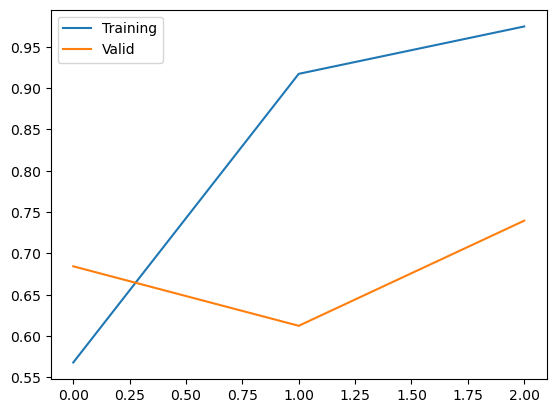

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label = 'Training')
plt.plot(history.history['val_accuracy'],label = 'Valid')
plt.legend()


In [10]:
zip = zipfile.ZipFile('10_food_classes_1_percent (1).zip')
zip.extractall()
zip.close()

In [12]:
train_dir = '10_food_classes_1_percent/train'
test_dir = '10_food_classes_1_percent/test'

In [14]:
IMAGE_SHAPE = (224,224)
BATCH_SZIE  = 32

train_data_1_percent = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                            image_size = IMAGE_SHAPE,
                                                            batch_size = BATCH_SIZE,
                                                            label_mode = 'categorical')
test_data = tf.keras.utils.image_dataset_from_directory(directory = test_dir,
                                                  image_size = IMAGE_SHAPE,
                                                  batch_size = BATCH_SIZE,
                                                  label_mode = 'categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [16]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = IMAGE_SHAPE + (3,))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10,activation = 'softmax')(x)

model_1 = tf.keras.Model(inputs,outputs)

In [18]:
model_1.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [20]:
model_1.fit(train_data_1_percent,epochs = 3,
           validation_data = test_data)

Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 68s 26s/step - accuracy: 0.0592 - loss: 2.4473 - val_accuracy: 0.1360 - val_loss: 2.3059
Epoch 2/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 48s 23s/step - accuracy: 0.2821 - loss: 2.1302 - val_accuracy: 0.2276 - val_loss: 2.1553
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 48s 23s/step - accuracy: 0.4174 - loss: 1.8858 - val_accuracy: 0.3172 - val_loss: 2.0237


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2)
])

10_food_classes_1_percent/train/pizza/3478964.jpg


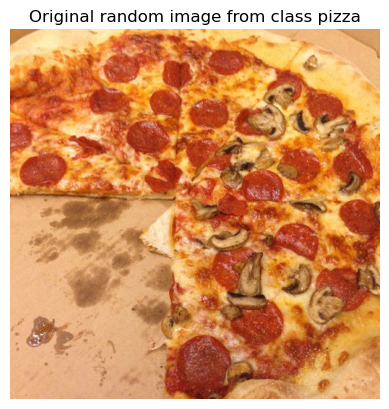

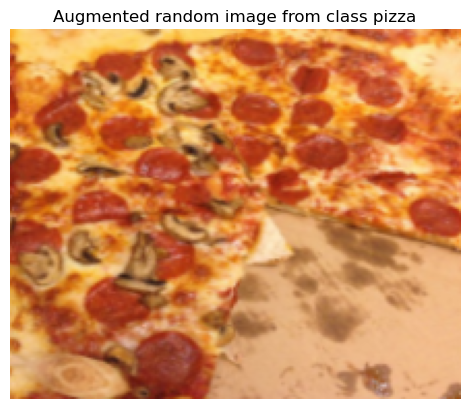

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
print(random_image_path)

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis(False)
plt.title(f"Original random image from class {target_class}")

img = tf.image.resize(img, size = (224, 224))
augmented_img = tf.squeeze(data_augmentation(tf.expand_dims(img, axis = 0)))
plt.figure()
plt.title(f"Augmented random image from class {target_class}")
plt.axis(False)
plt.imshow(augmented_img/255.)

In [34]:
img.shape

TensorShape([224, 224, 3])

In [36]:
tf.expand_dims(img,axis = 0).shape

TensorShape([1, 224, 224, 3])

In [40]:
tf.squeeze(tf.expand_dims(img,axis = 0)).shape

TensorShape([224, 224, 3])

In [50]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3))
x = data_augmentation(inputs)
x = base_model(x,training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10,activation = 'softmax')(x)

model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history_1_percent = model_1.fit(train_data_1_percent,
                                epochs = 5,
                                steps_per_epoch = len(train_data_1_percent),
                                validation_data = test_data,
                                validation_steps = int(0.25 * len(test_data)))

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 7s/step - accuracy: 0.0858 - loss: 2.3745 - val_accuracy: 0.1530 - val_loss: 2.2401
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1447 - val_loss: 2.2414
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.2119 - loss: 2.1857 - val_accuracy: 0.2138 - val_loss: 2.1595
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2368 - val_loss: 2.1219
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3134 - loss: 2.0116 - val_accuracy: 0.2794 - val_loss: 2.0107


In [3]:
import tensorflow as tf

train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [5]:
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_data = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                        image_size = IMAGE_SHAPE,
                                                        batch_size=BATCH_SIZE,
                                                        label_mode = 'categorical')
test_data = tf.keras.utils.image_dataset_from_directory(directory = test_dir,
                                                        image_size = IMAGE_SHAPE,
                                                        batch_size=BATCH_SIZE,
                                                        label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    layers.RandomFlip('horizontal'),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2)
],name = 'data_augmentation')

data_augmentation.summary()

Model: "data_augmentation"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_2 (RandomFlip)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_height_1 (RandomHeight)  │ (None, None, 224, 3)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_width_1 (RandomWidth)    │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, None, None, 3)  │             0 │
│ (RandomRotation)                │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
checkpoint_path = '10_percent_model_checkpoints_weights/checkpoint.weights.h5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=True,
                                                        save_freq='epoch',
                                                        verbose = 1)

In [21]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3))

x = data_augmentation(inputs)
x = base_model(x,training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10,activation = 'softmax')(x)

model_2 = tf.keras.models.Model(inputs,outputs)

model_2.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [25]:
history_10_percent_aug = model_2.fit(train_data,epochs = 4,
                                    validation_data = test_data,
                                    callbacks=[checkpoint_callback])

Epoch 1/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.2066 - loss: 2.1980
Epoch 1: val_loss improved from inf to 1.53691, saving model to 10_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.2101 - loss: 2.1913 - val_accuracy: 0.6268 - val_loss: 1.5369
Epoch 2/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.6433 - loss: 1.5088
Epoch 2: val_loss improved from 1.53691 to 1.12230, saving model to 10_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.6429 - loss: 1.5060 - val_accuracy: 0.7368 - val_loss: 1.1223
Epoch 3/4
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.6600 - loss: 1.2026
Epoch 3: val_loss improved from 1.12230 to 0.93162, saving model to 10_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.6609 - loss: 1.2003 - val_accuracy: 0.7720 - val_loss: 0.9316
Epoch 4/4
24/24 ━━━━━━━

In [27]:
model_2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

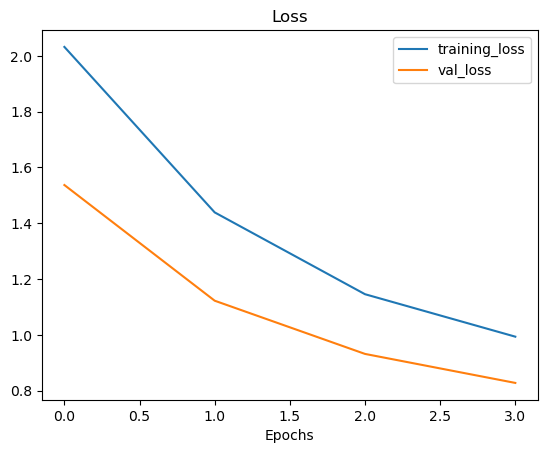

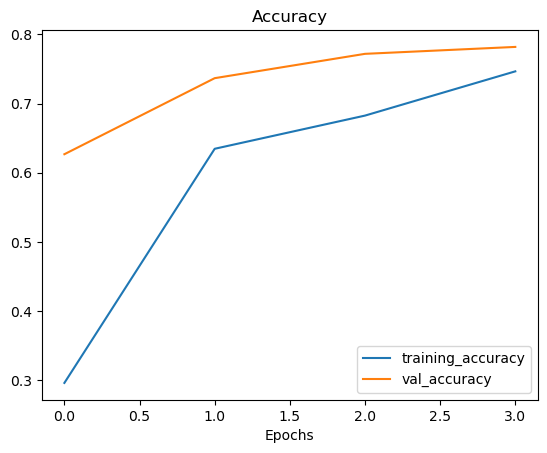

In [31]:
plot_loss_curves(history_10_percent_aug)

In [35]:
model_2.load_weights('10_percent_model_checkpoints_weights/checkpoint.weights.h5')

In [37]:
for layer in model_2.layers:
    print(layer,layer.trainable)

<InputLayer name=input_layer_8, built=True> True
<Sequential name=data_augmentation, built=True> True
<Functional name=efficientnetb0, built=True> False
<GlobalAveragePooling2D name=global_average_pooling2d_2, built=True> True
<Dense name=dense_2, built=True> True


In [51]:
for layer in model_2.layers[2].layers:
    print(layer,layer.trainable)

<InputLayer name=input_layer_7, built=True> False
<Rescaling name=rescaling_4, built=True> False
<Normalization name=normalization_2, built=True> False
<Rescaling name=rescaling_5, built=True> False
<ZeroPadding2D name=stem_conv_pad, built=True> False
<Conv2D name=stem_conv, built=True> False
<BatchNormalization name=stem_bn, built=True> False
<Activation name=stem_activation, built=True> False
<DepthwiseConv2D name=block1a_dwconv, built=True> False
<BatchNormalization name=block1a_bn, built=True> False
<Activation name=block1a_activation, built=True> False
<GlobalAveragePooling2D name=block1a_se_squeeze, built=True> False
<Reshape name=block1a_se_reshape, built=True> False
<Conv2D name=block1a_se_reduce, built=True> False
<Conv2D name=block1a_se_expand, built=True> False
<Multiply name=block1a_se_excite, built=True> False
<Conv2D name=block1a_project_conv, built=True> False
<BatchNormalization name=block1a_project_bn, built=True> False
<Conv2D name=block2a_expand_conv, built=True> Fal

In [61]:
base_model.trainable = False

for layer in base_model.layers[-10:]:
    layer.trainable = True

model_2.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [63]:
for i,layer in enumerate(base_model.layers):
    print(i,layer,layer.trainable)

0 <InputLayer name=input_layer_7, built=True> False
1 <Rescaling name=rescaling_4, built=True> False
2 <Normalization name=normalization_2, built=True> False
3 <Rescaling name=rescaling_5, built=True> False
4 <ZeroPadding2D name=stem_conv_pad, built=True> False
5 <Conv2D name=stem_conv, built=True> False
6 <BatchNormalization name=stem_bn, built=True> False
7 <Activation name=stem_activation, built=True> False
8 <DepthwiseConv2D name=block1a_dwconv, built=True> False
9 <BatchNormalization name=block1a_bn, built=True> False
10 <Activation name=block1a_activation, built=True> False
11 <GlobalAveragePooling2D name=block1a_se_squeeze, built=True> False
12 <Reshape name=block1a_se_reshape, built=True> False
13 <Conv2D name=block1a_se_reduce, built=True> False
14 <Conv2D name=block1a_se_expand, built=True> False
15 <Multiply name=block1a_se_excite, built=True> False
16 <Conv2D name=block1a_project_conv, built=True> False
17 <BatchNormalization name=block1a_project_bn, built=True> False
18 <C

In [67]:
initial_epochs = 4

In [71]:
fine_tune_epochs = initial_epochs + 5

history_10_percent_fine_tune = model_2.fit(train_data,epochs = fine_tune_epochs,
                                          validation_data = test_data,
                                          initial_epoch= history_10_percent_aug.epoch[-1])

Epoch 4/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.7215 - loss: 0.9286 - val_accuracy: 0.8012 - val_loss: 0.6120
Epoch 5/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.8768 - loss: 0.4123 - val_accuracy: 0.8320 - val_loss: 0.5114
Epoch 6/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.9111 - loss: 0.2918 - val_accuracy: 0.8508 - val_loss: 0.4665
Epoch 7/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9362 - loss: 0.2446 - val_accuracy: 0.8592 - val_loss: 0.4275
Epoch 8/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9603 - loss: 0.1856 - val_accuracy: 0.8584 - val_loss: 0.4339
Epoch 9/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9701 - loss: 0.1503 - val_accuracy: 0.8748 - val_loss: 0.3930


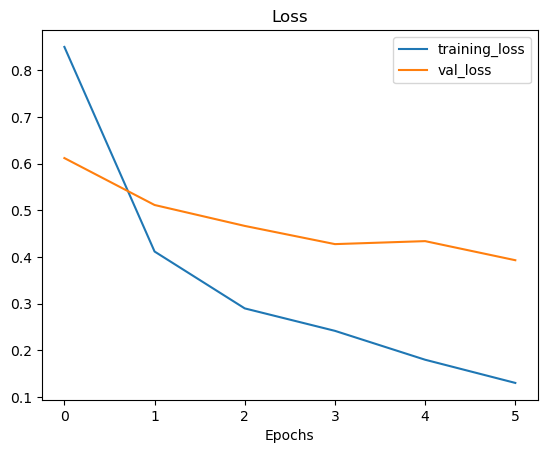

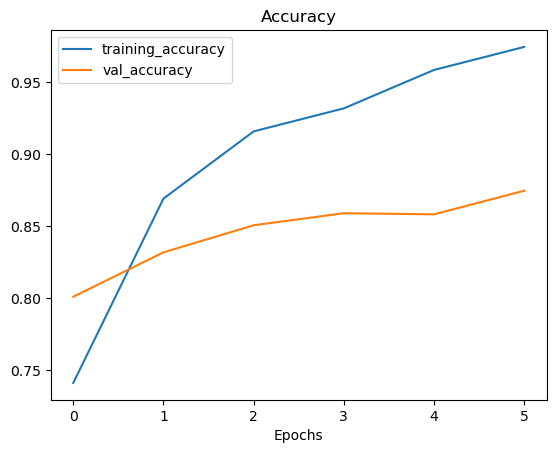

In [73]:
plot_loss_curves(history_10_percent_fine_tune)